# Cancer Survivability Prediction

## Table of Contents
---
1. [Loading and Setup](#loadingandsetup)
2. [Data Assessment](#assessment)
3. [EDA](#eda)
4. [Conclusions](#conclusions)

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [89]:
#load the data
df = pd.read_csv('cancer_data_clean.csv',index_col = 0)

## Data Assessment <a class="anchor" id="assessment"></a>

First we will refamiliarize ourselves with the cleaned data set

In [66]:
#check the shape of the data
df.shape

(25775, 47)

In [90]:
#inspect the fist 5 rows of the data set
df.head()

,Sample ID,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,...,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
0,P-0000004-T01-IM3,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,...,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0,39.1225
1,P-0000015-T01-IM3,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,...,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0,44.6775
2,P-0000024-T01-IM3,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,...,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0,61.5050
3,P-0000025-T02-IM5,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,...,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0,73.9075
4,P-0000026-T01-IM3,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,...,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0,72.5350


In [68]:
#Display the info of the data set to check the null values and data types - there should be no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, 0 to 25774
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      25775 non-null  object 
 1   Age at Sequencing              25775 non-null  float64
 2   Age at Surgical Procedure      25775 non-null  float64
 3   Cancer Type                    25775 non-null  object 
 4   Cancer Type Detailed           25775 non-null  object 
 5   Distant Mets: Adrenal Gland    25775 non-null  object 
 6   Distant Mets: Biliary tract    25775 non-null  object 
 7   Distant Mets: Bladder/UT       25775 non-null  object 
 8   Distant Mets: Bone             25775 non-null  object 
 9   Distant Mets: Bowel            25775 non-null  object 
 10  Distant Mets: Breast           25775 non-null  object 
 11  Distant Mets: CNS/Brain        25775 non-null  object 
 12  Distant Mets: Distant LN       25775 non-null  obje

**Observations**

The above is the summary of the imported cleaned data set with 25,775 entries and 47 features. Previous to this, the original data set was processed and cleaned to filter out initally apparent redundant columns and to replace null values with useful values.  What you see above is the cleaned version of the data set.

The original data set contained 25,775 rows and 55 features. There were no duplicated columns or rows, however there were columns removed that showed full correlation.  There were also 14 columns with null values that were either dropped or filled in during cleaning. There are now 35 object columns, 3 integer columns, 8 float columns and 1 bool column.  Further processing may be needed as we get to the modeling phase of the project.  There are no more missing values. The original data set was retained and can be loaded if dropped features and replaced values are needed in the future.

In [69]:
#Lets take a look at the statistical properties of the numerical columns
df.describe()

,Age at Sequencing,Age at Surgical Procedure,Fraction Genome Altered,Met Count,Met Site Count,MSI Score,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age
count,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000,25775.000000
mean,62.306086,61.507243,0.194728,3.857187,3.011988,1.285071,22.133393,660.395267,7.954993,39.735375,62.303043
std,12.833110,12.930445,0.191612,3.736549,2.579182,4.635787,17.657943,212.485348,19.447016,20.516239,12.791423
min,18.290000,17.160000,0.000000,0.000000,0.000000,-1.000000,0.000000,100.000000,0.000000,0.000000,18.296667
25%,54.450000,53.550000,0.029900,1.000000,1.000000,0.000000,8.480000,526.000000,2.218311,20.000000,54.435000
50%,63.660000,62.810000,0.142800,3.000000,2.000000,0.230000,17.540000,653.000000,4.323490,40.000000,63.655000
75%,71.430000,70.630000,0.305400,6.000000,5.000000,0.860000,33.020000,790.000000,6.917585,50.000000,71.347500
max,90.000000,90.000000,1.000000,31.000000,15.000000,53.440000,80.890000,2778.000000,654.576458,100.000000,90.000000


There are 11 numerical columns. The above shows a summary of core statistics for these columns:
- `Count`: Number of entries
- `Mean`: Average value down the colum
- `std`: The standard deviation
- `min`: The minimum value found in that column
- `Percentiles`: The upper, middle and lower percentile values of the data
- `max`: The max value of that column

## EDA <a class="anchor" id="eda"></a>

Lets split up the numerical and categorical columns for ease of EDA

In [70]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64'])
categorical_columns = df.select_dtypes(include = ['object'])

First we are going to explore the numerical columns

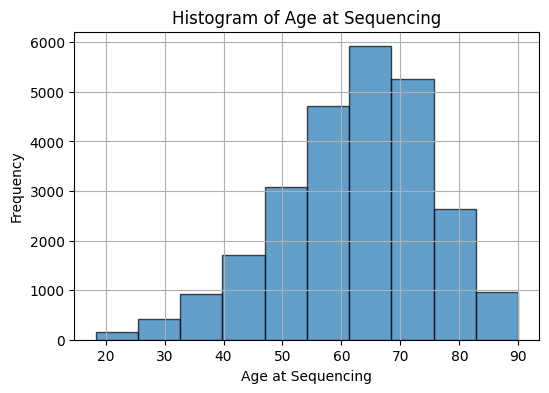

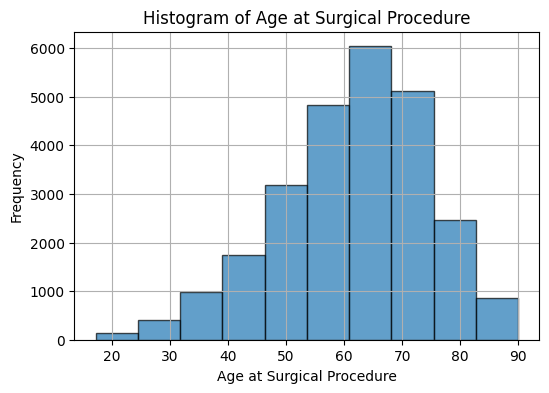

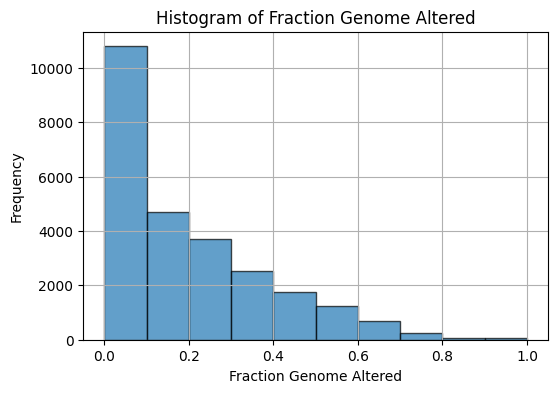

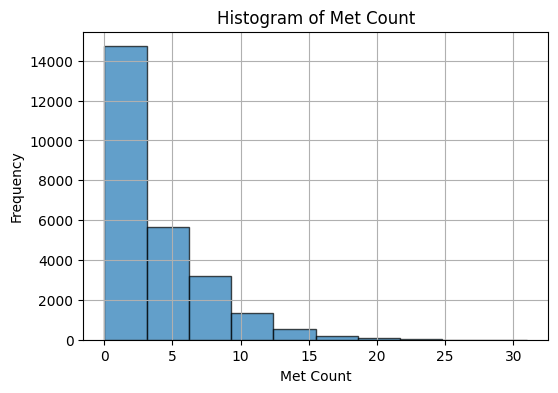

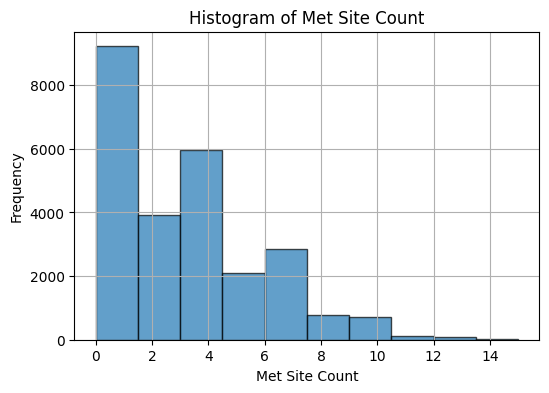

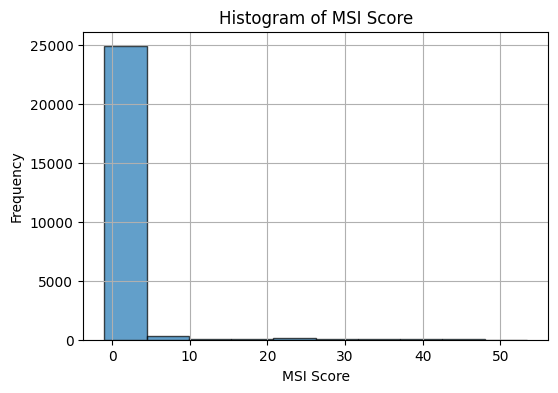

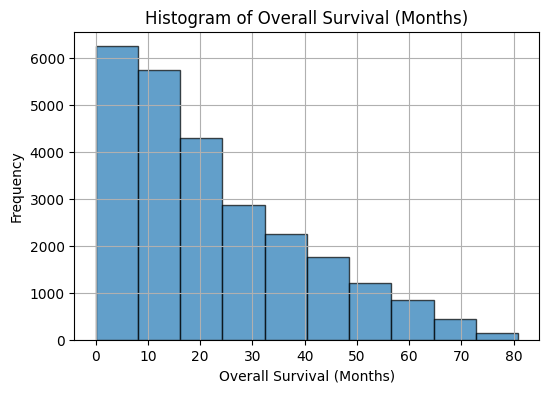

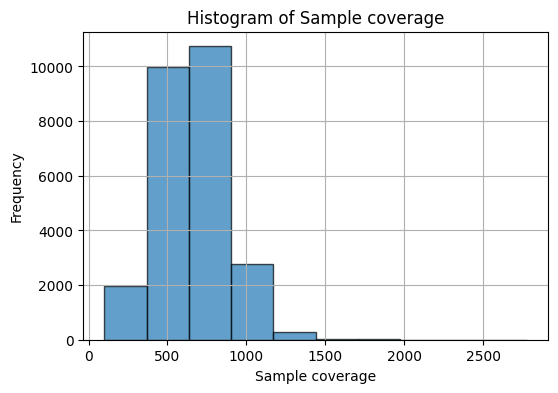

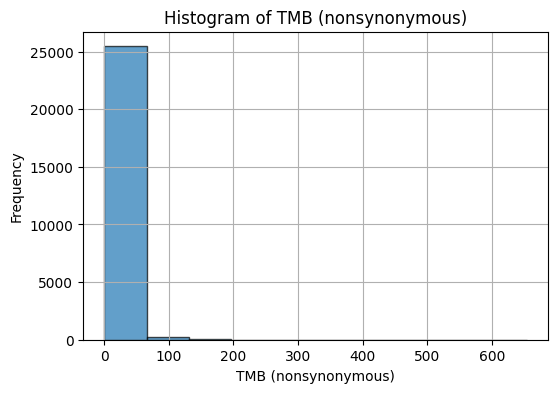

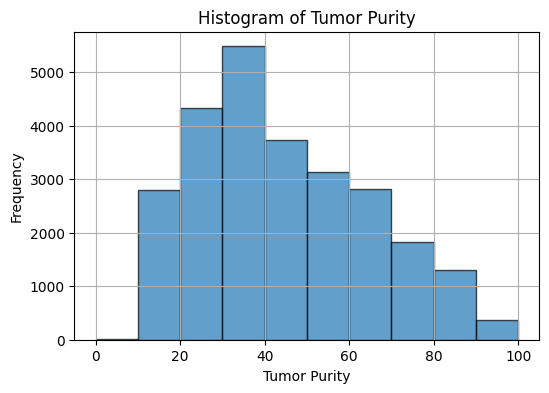

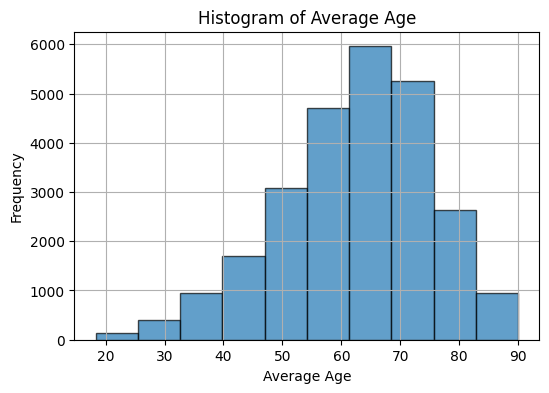

In [71]:
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)  
    plt.title(f'Histogram of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.grid(True)
    plt.show()  

**Findings:**

There are 11 numerical columns for which I have plotted the histogram distribution above.

There are some distributions to note:
- `Age at Sequencing`,`Age at Surgical Procedure`,`Average Age` are the age columns which are all normally distributed with a slight skew to the left. This makes sense as variation in ages will remain the same throughout the study so if they start out normally distributed, they will remain that way.
- `Fractional Fenome Altered`, `Met Count`, `Met Site Count`, `Overall Survival (months)` are very right (positively) skewed - meaning most of their values fall in the lower end of their range 
- `Sample coverage` seems to have a left shifted normal distribution
- `MSI score` and `TMB` do not have a very wide distribution most values are clustered in the lower range.



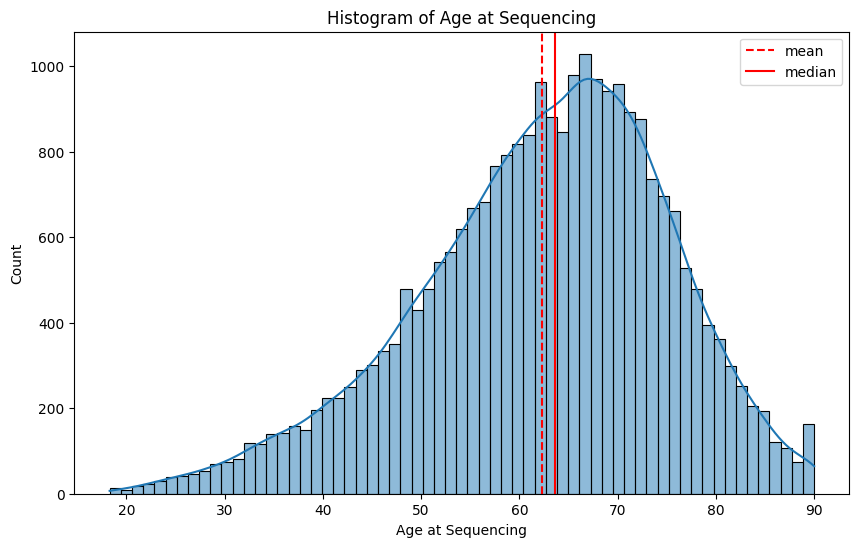

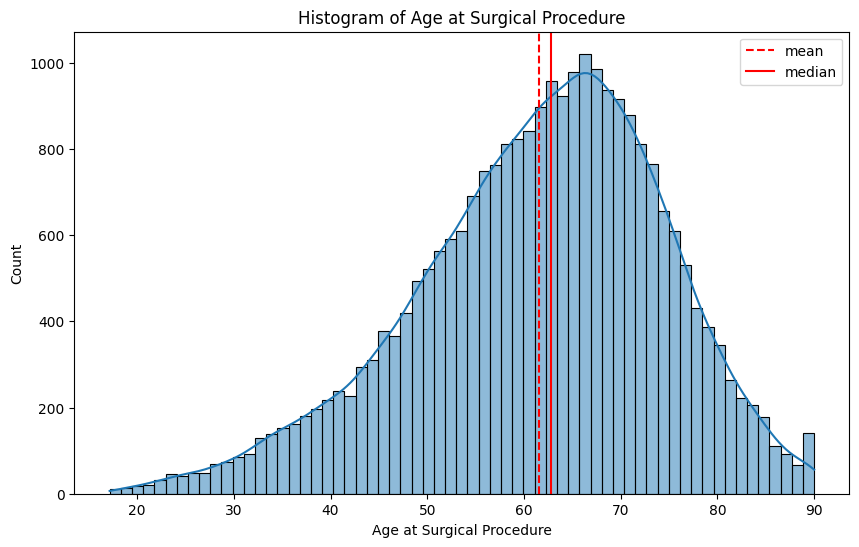

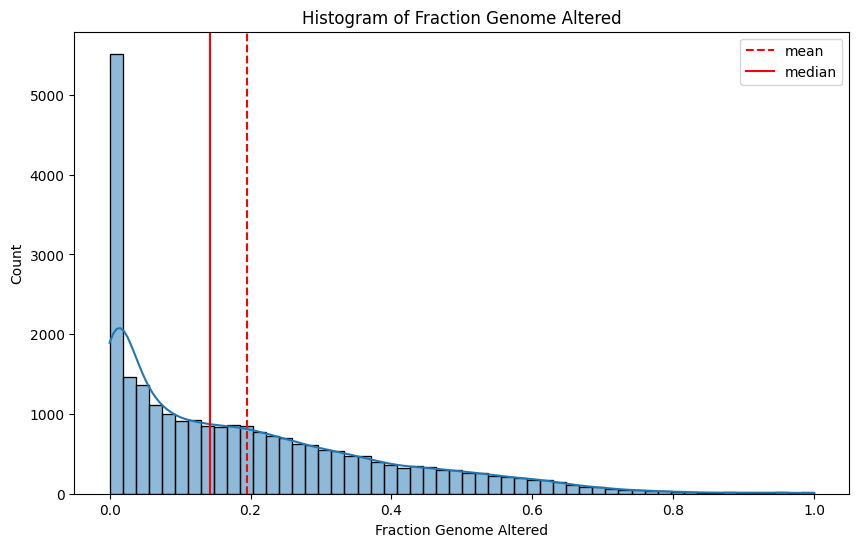

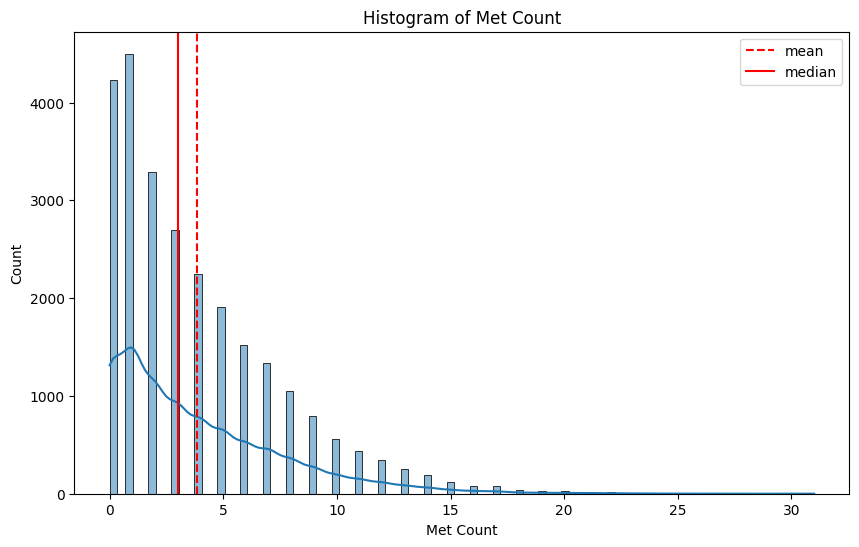

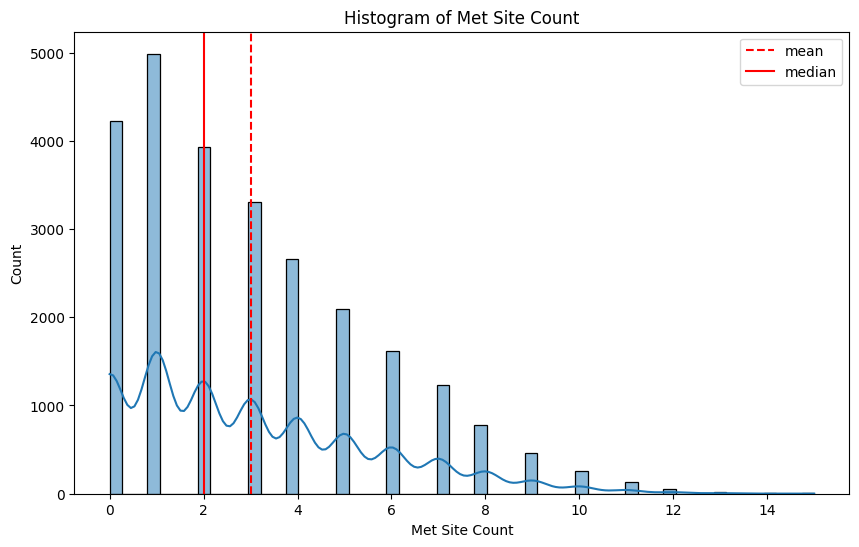

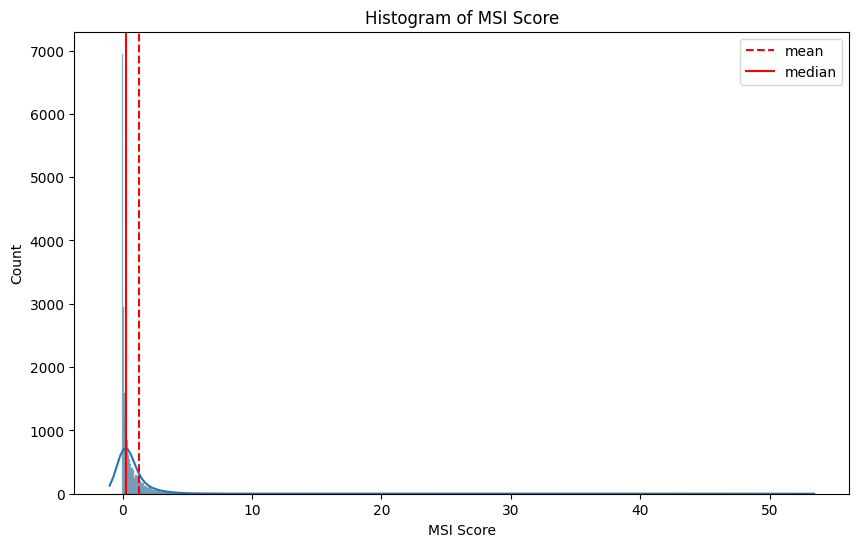

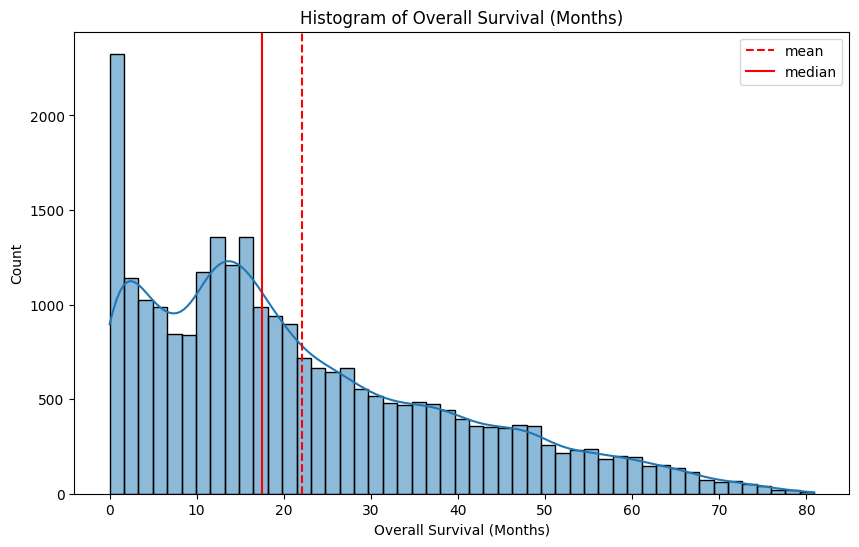

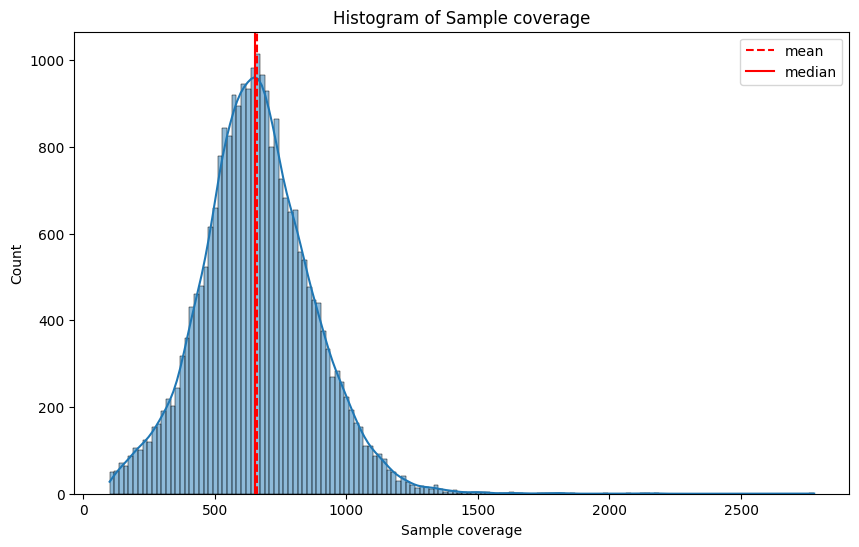

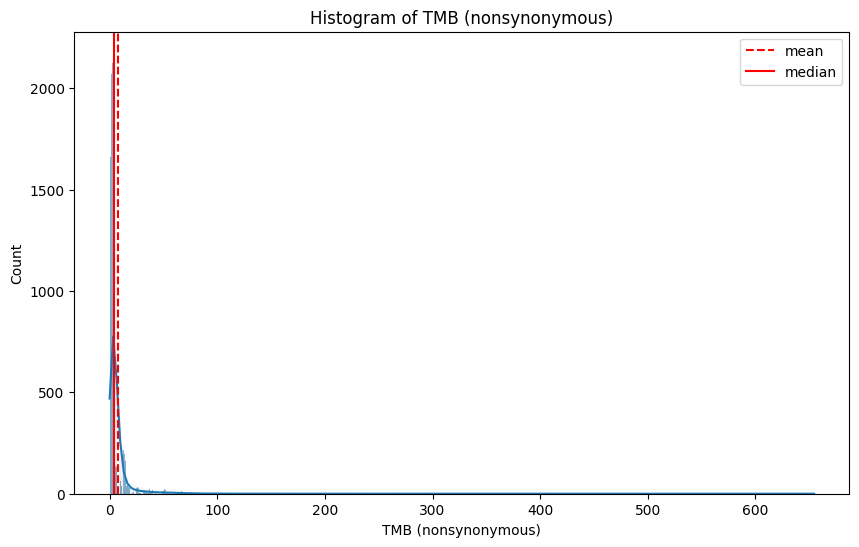

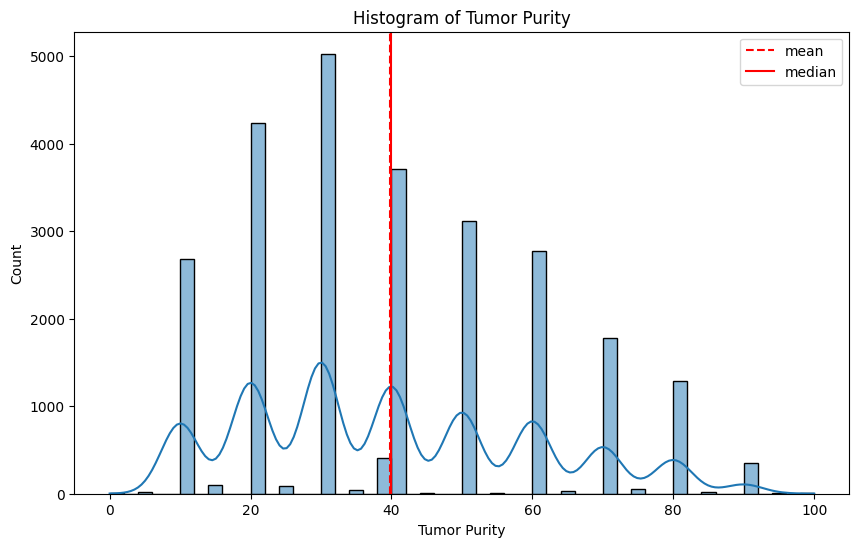

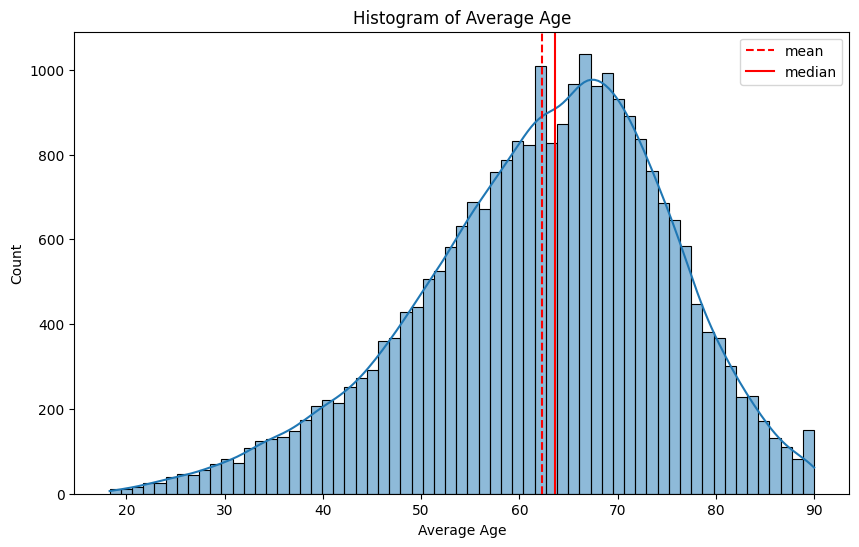

In [72]:
# another way to visualize using seaborn
for column in numerical_columns.columns:

    column_mean=df[column].mean()
    column_median=df[column].median()

# Plot a histogram of the numerical columns, with lines marking mean and median
###
    plt.figure(figsize=(10,6))
    sns.histplot(df[column], kde=True)
    plt.axvline(column_mean, label='mean',color='r',linestyle='--')
    plt.axvline(column_median, label='median', color='r')
    plt.title(f'Histogram of {column}')
    plt.legend()

    plt.show()


Seaborn will automatically calculate the best bin size to use. Note the distributions are similar but these are a better visualization of the true distribution.

Lets now take a look at the categorical columns:

/var/folders/dp/r86j009572g6fk5d87hv187h0000gp/T/ipykernel_84066/340564897.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


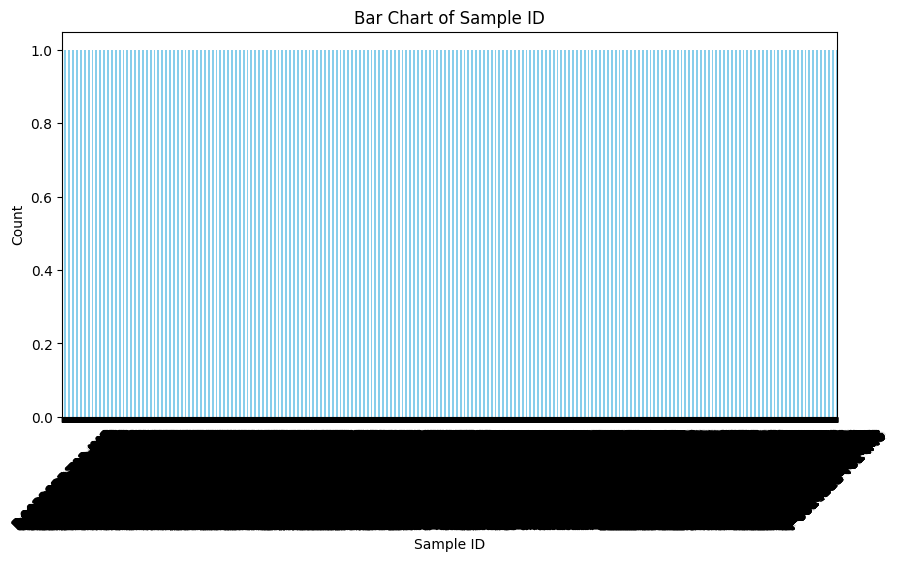

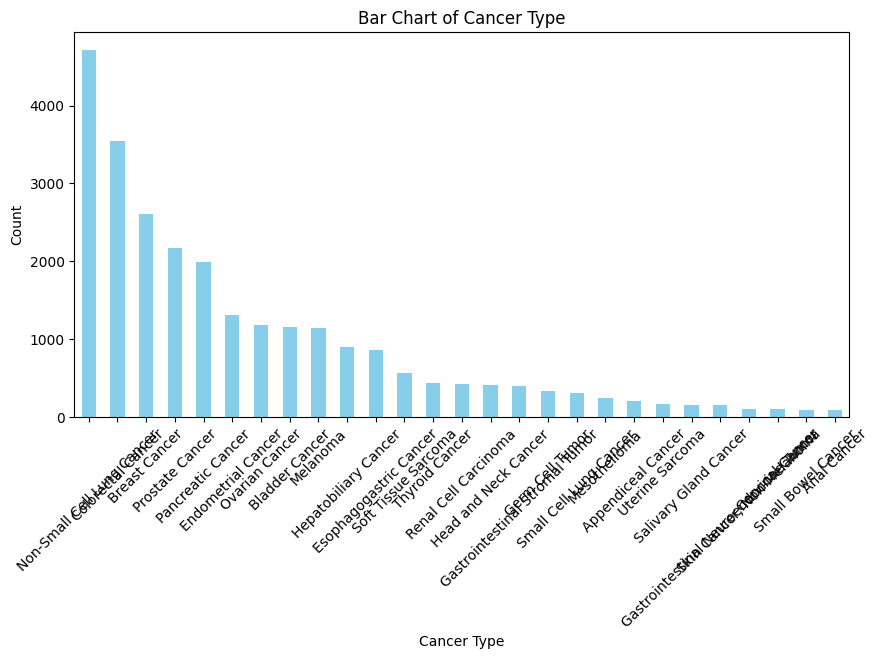

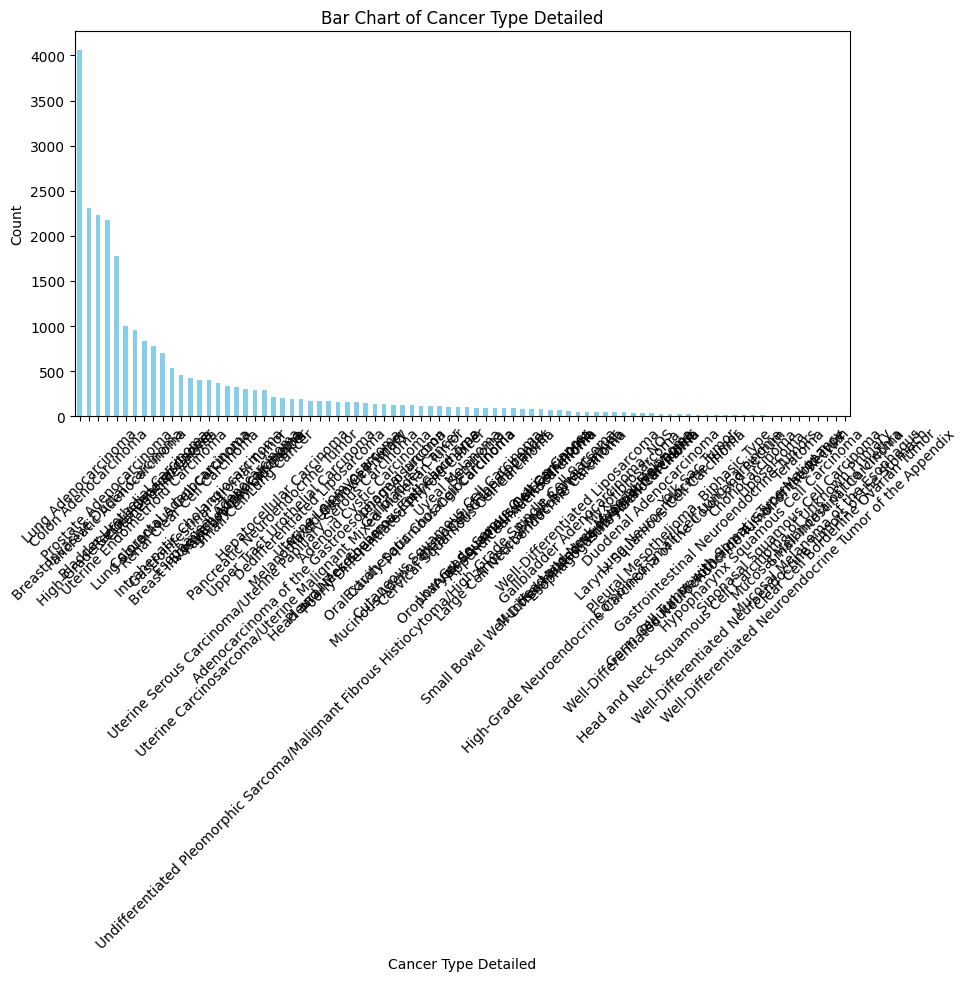

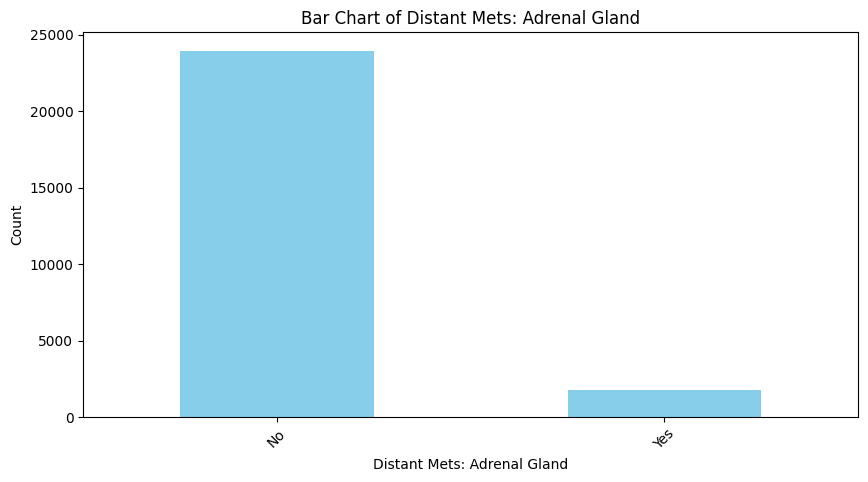

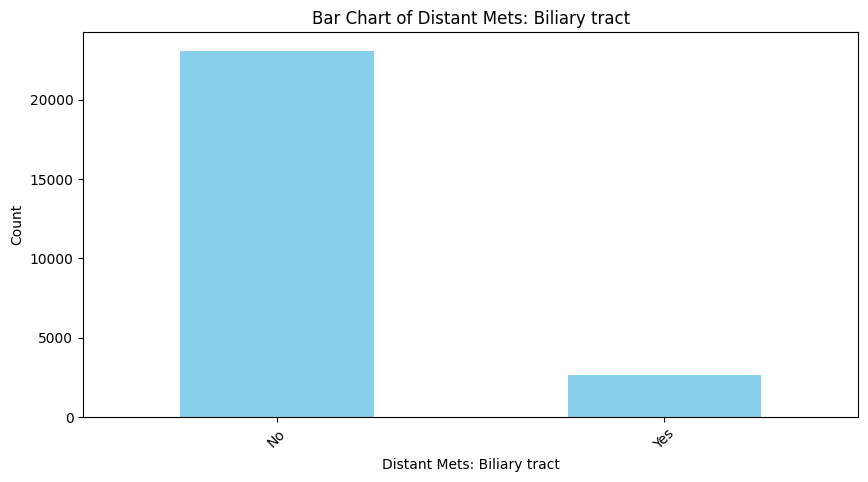

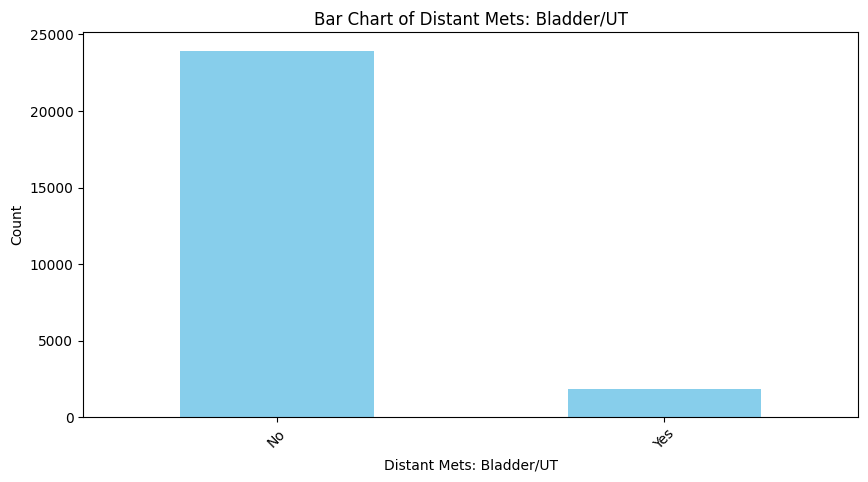

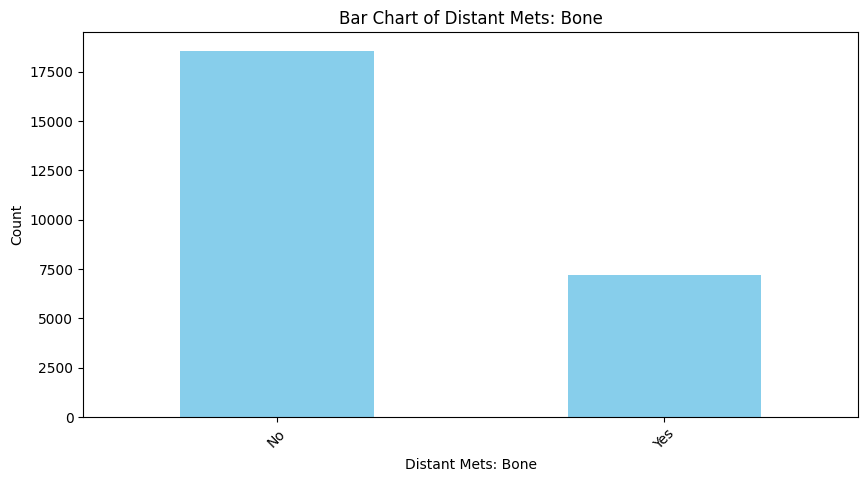

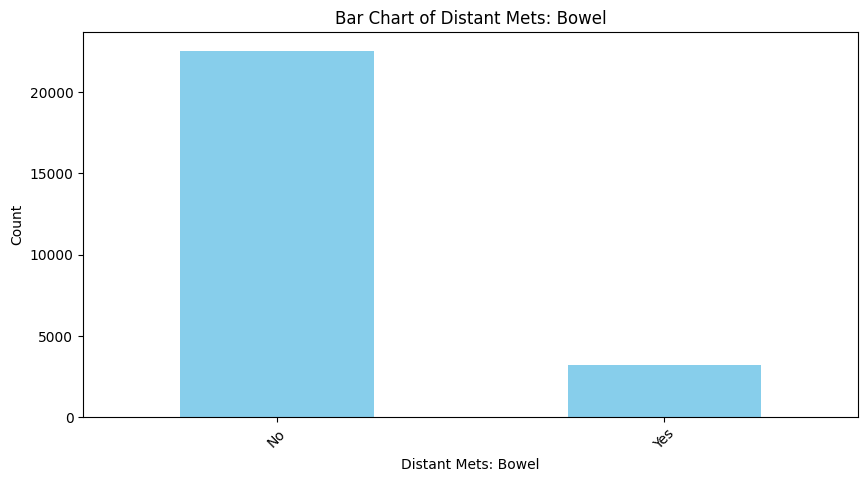

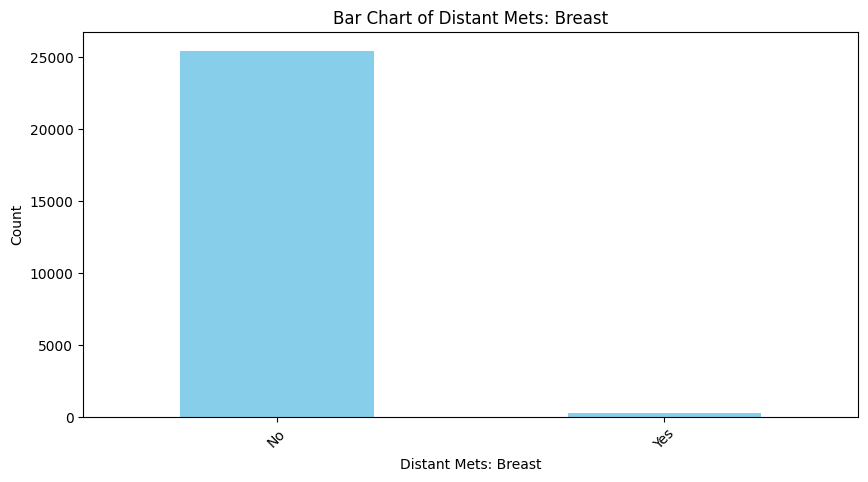

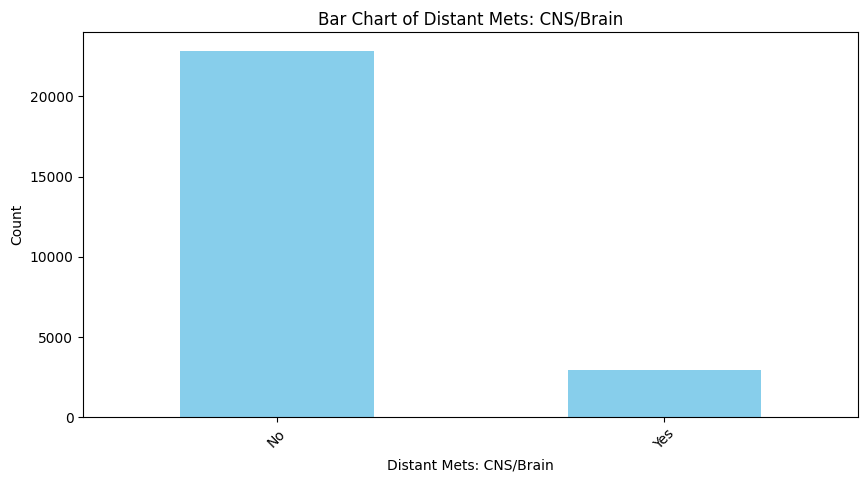

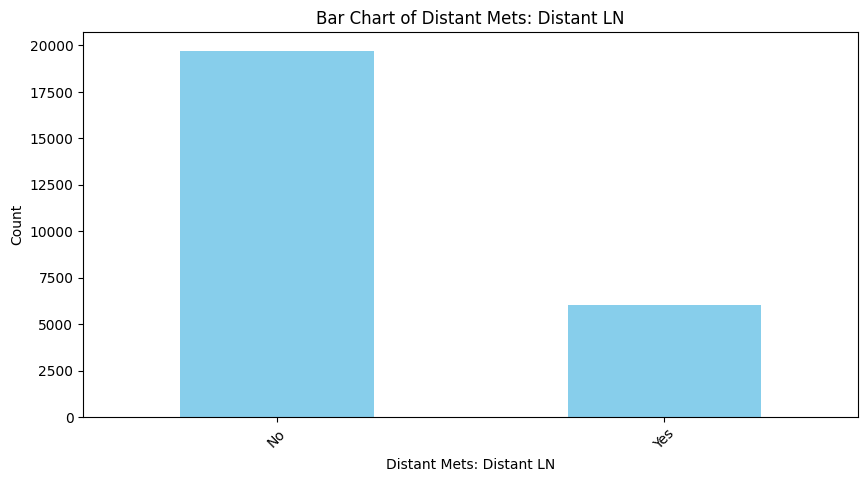

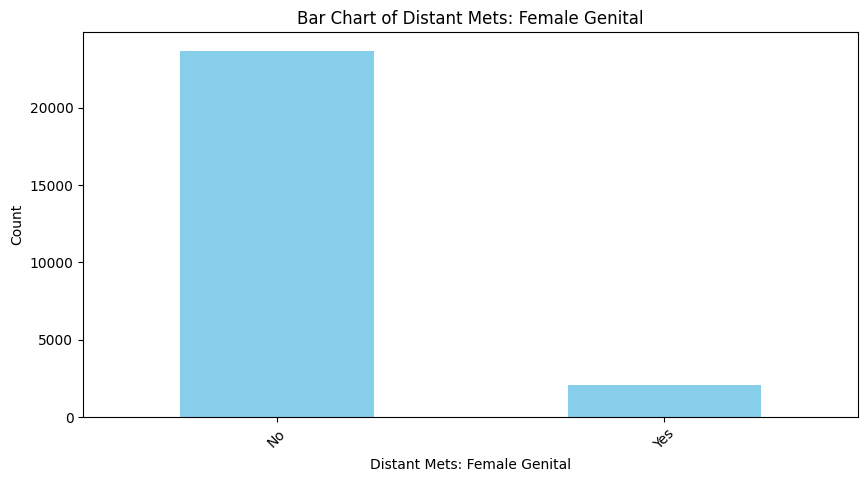

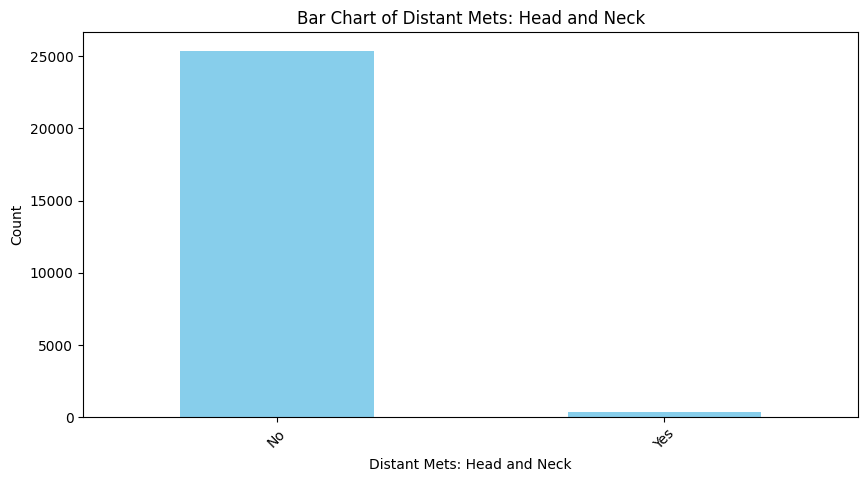

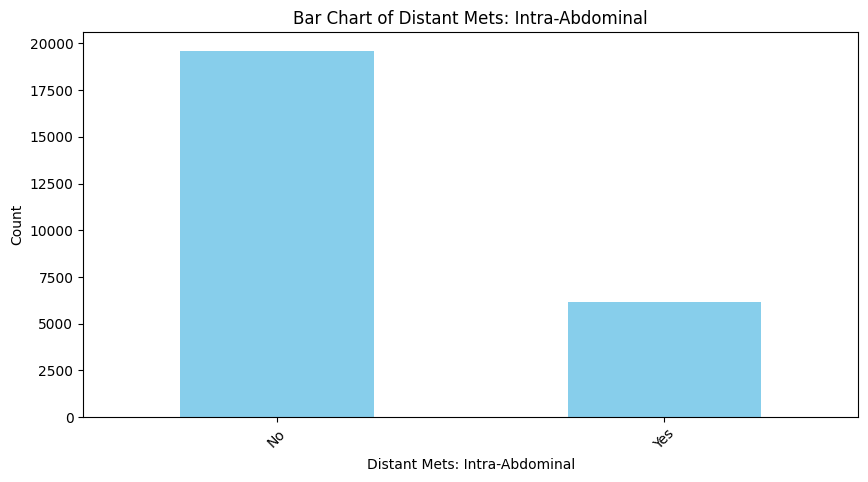

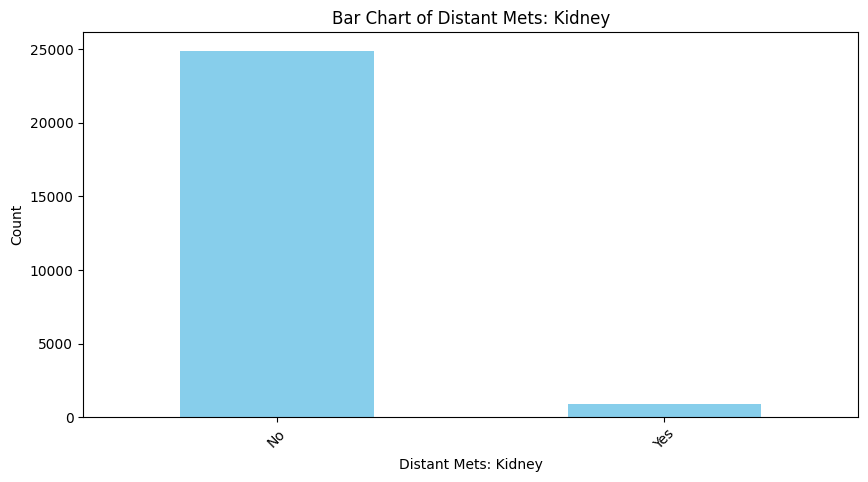

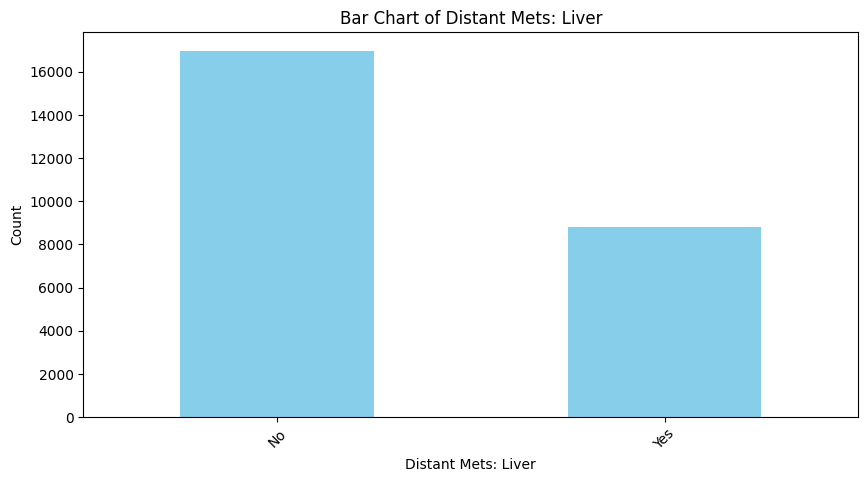

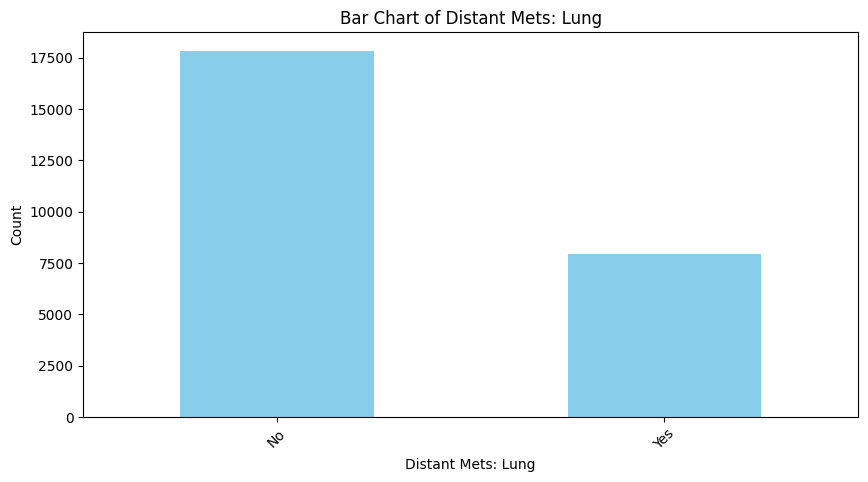

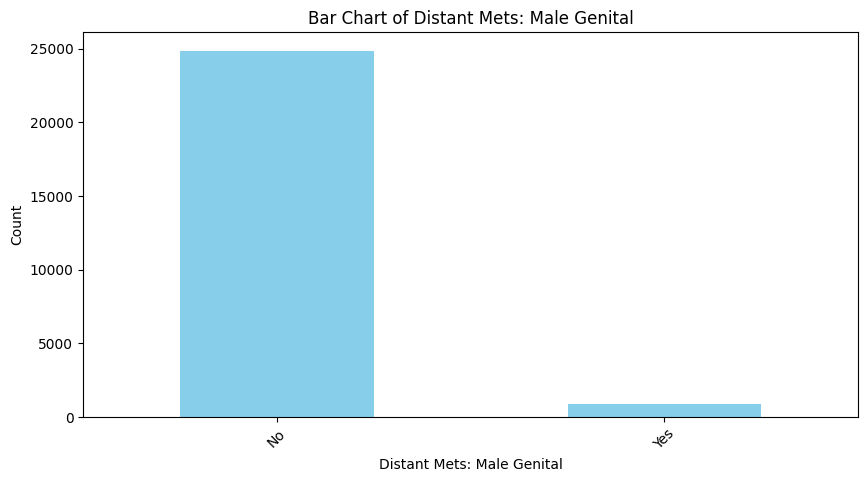

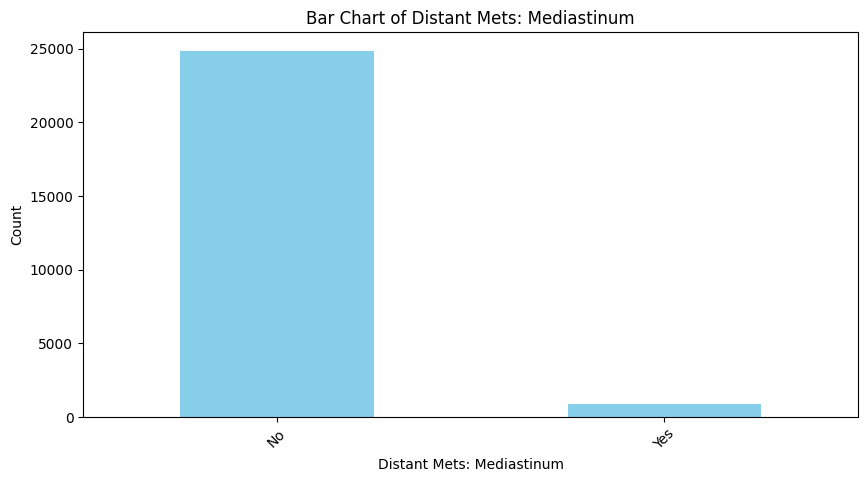

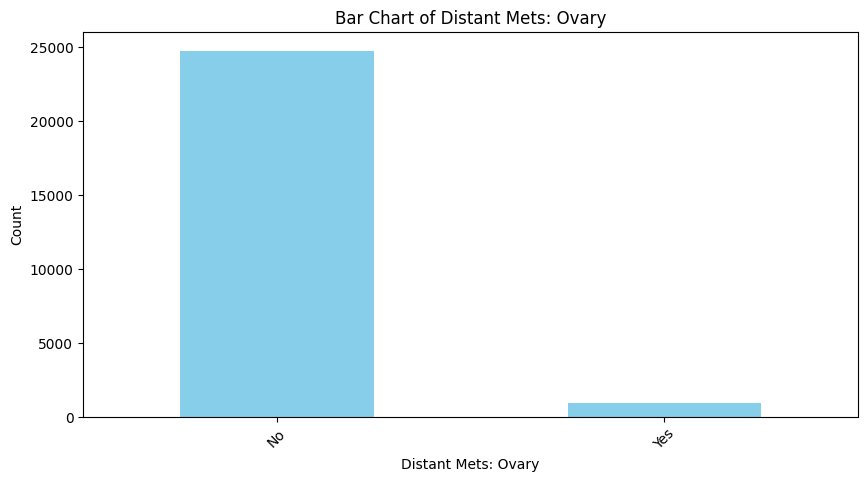

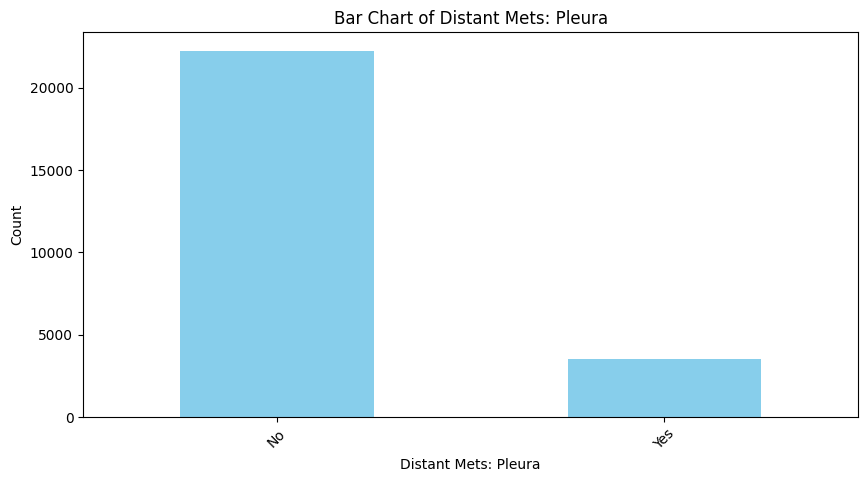

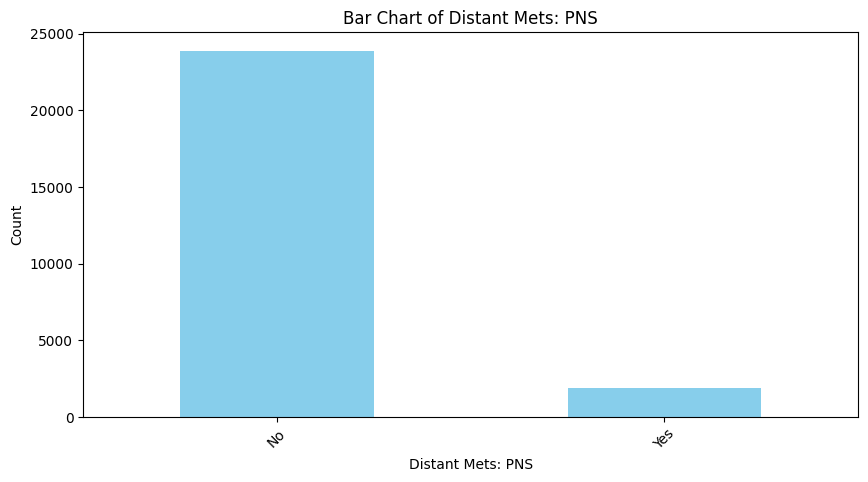

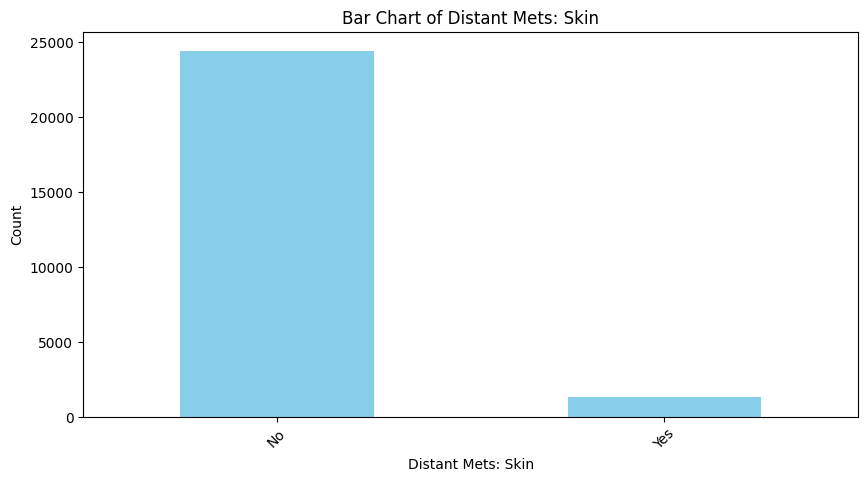

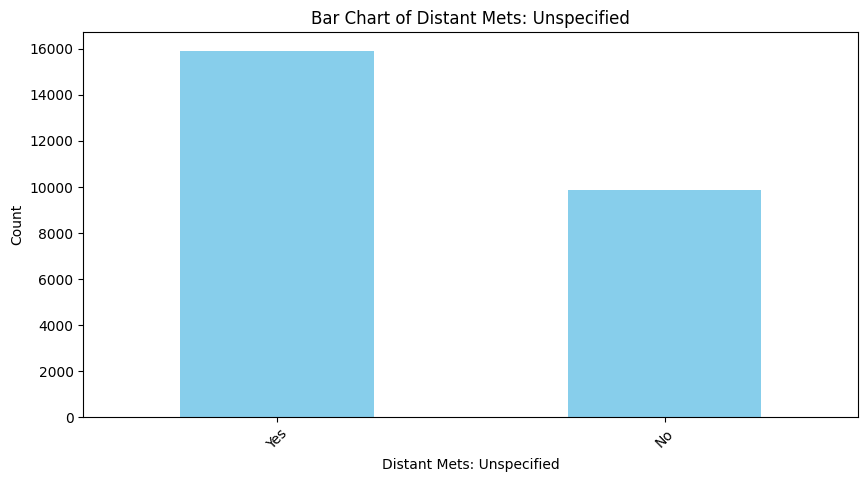

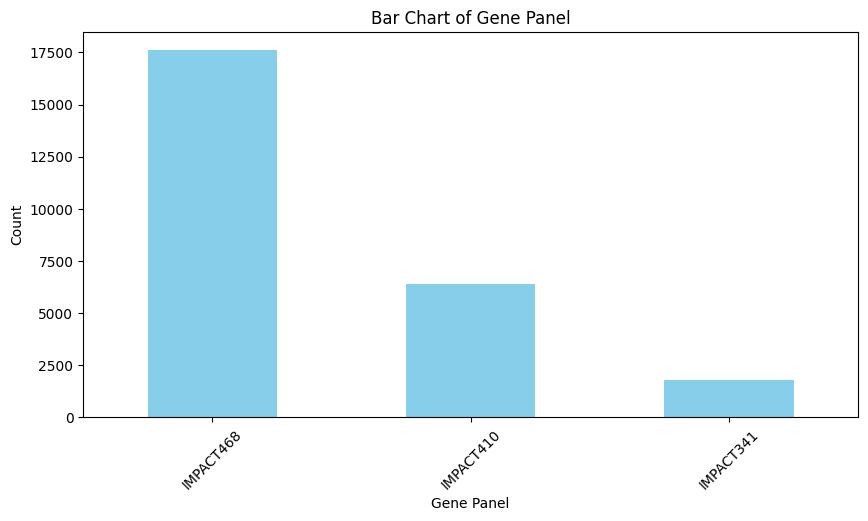

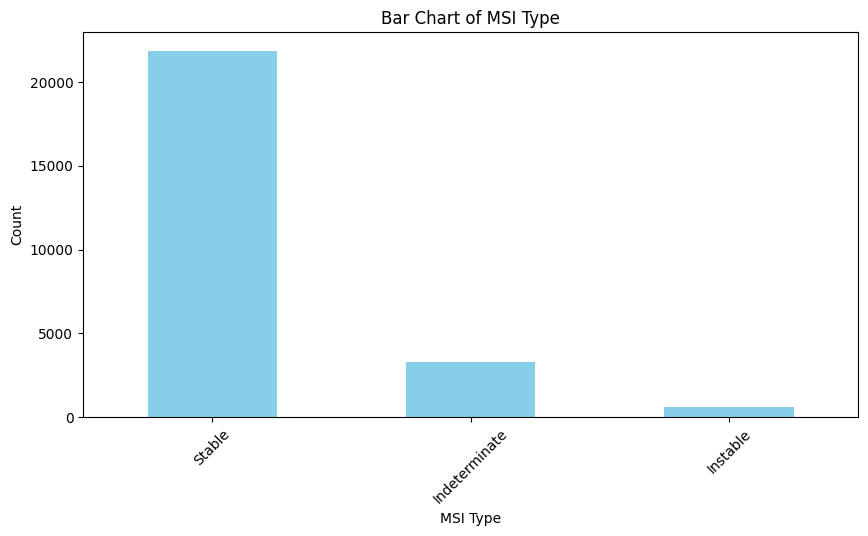

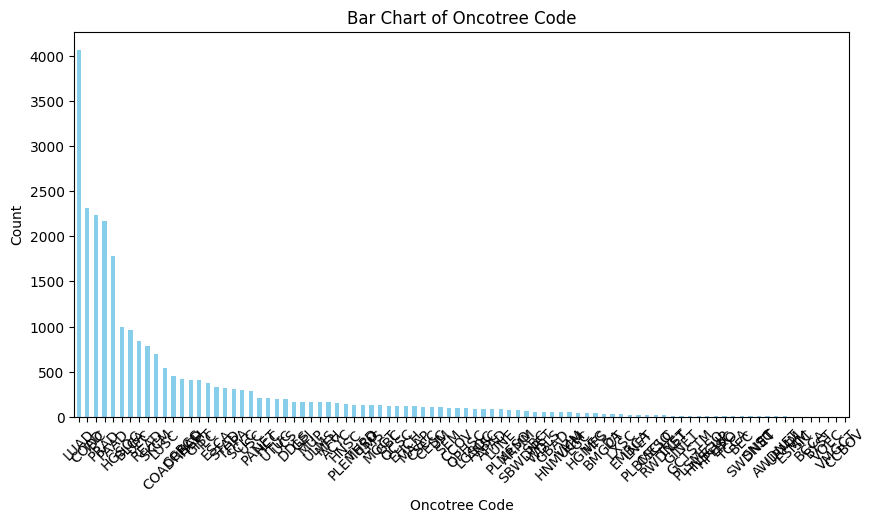

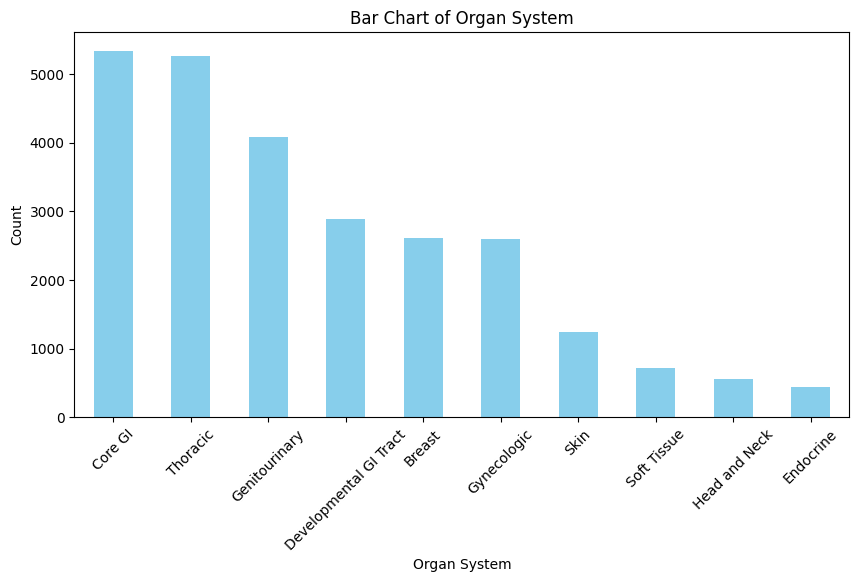

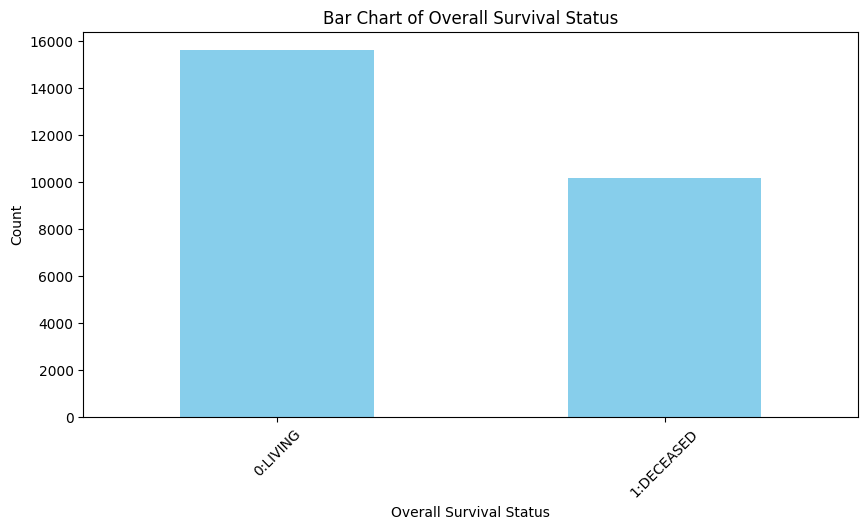

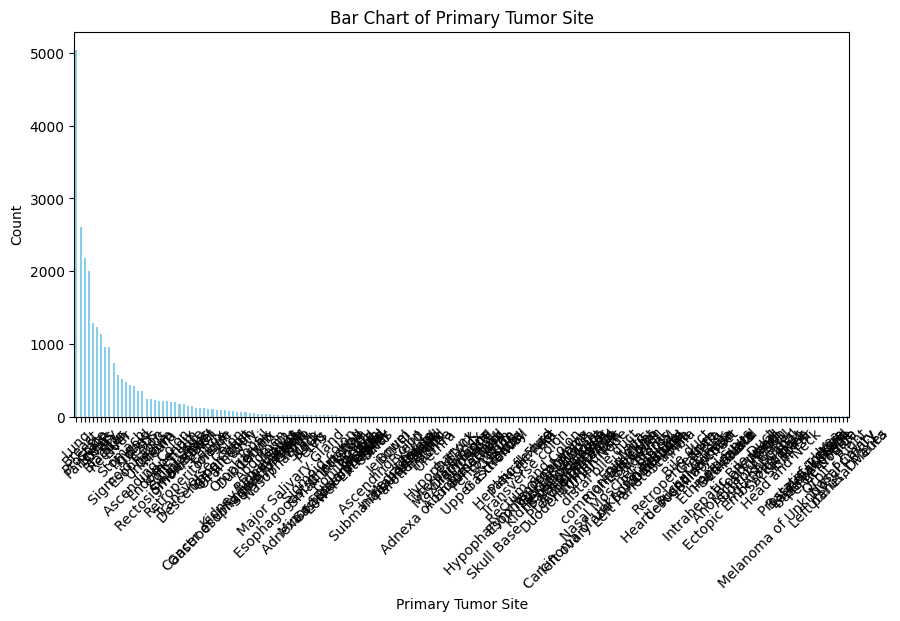

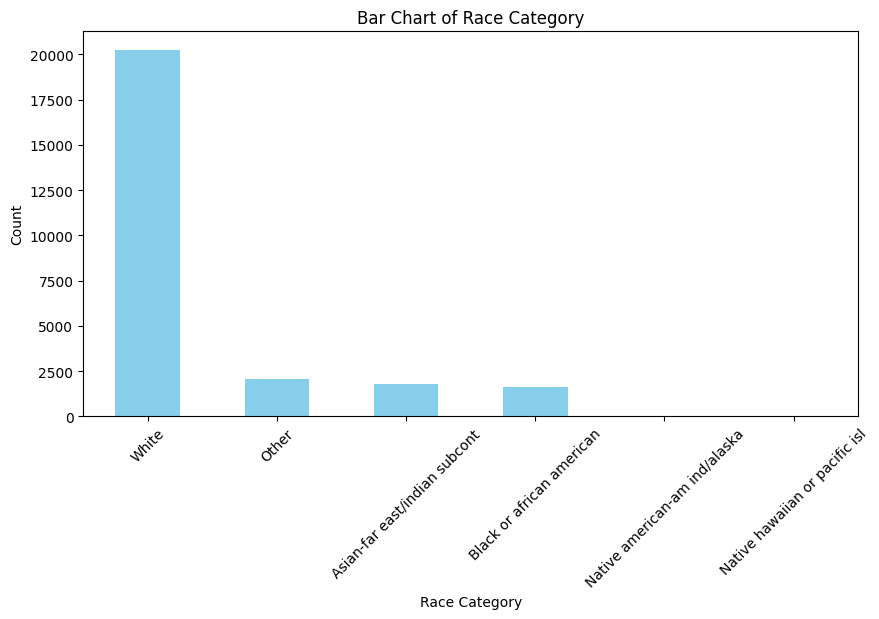

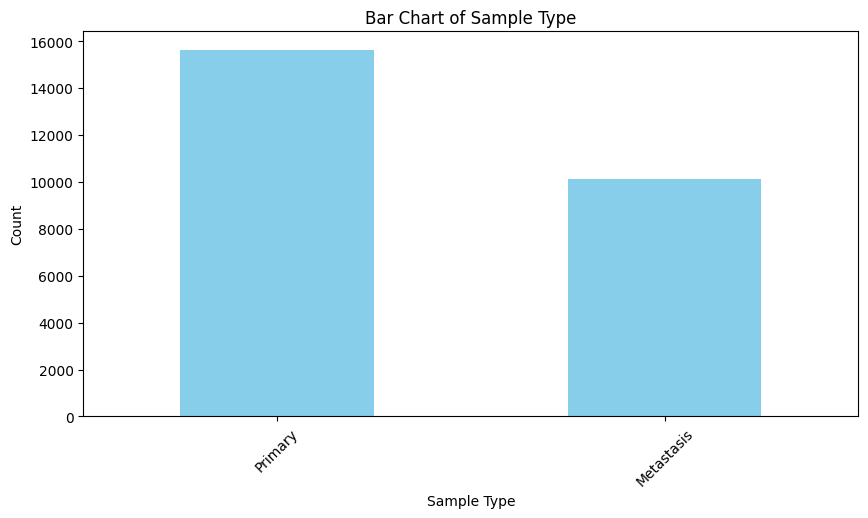

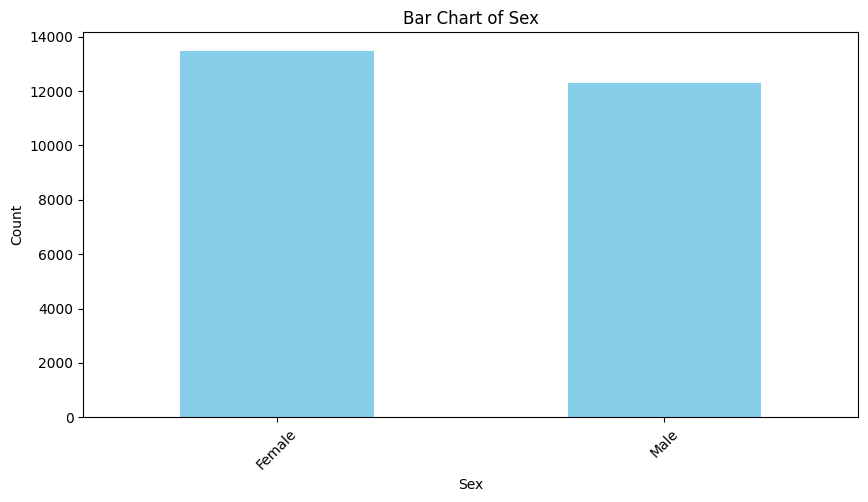

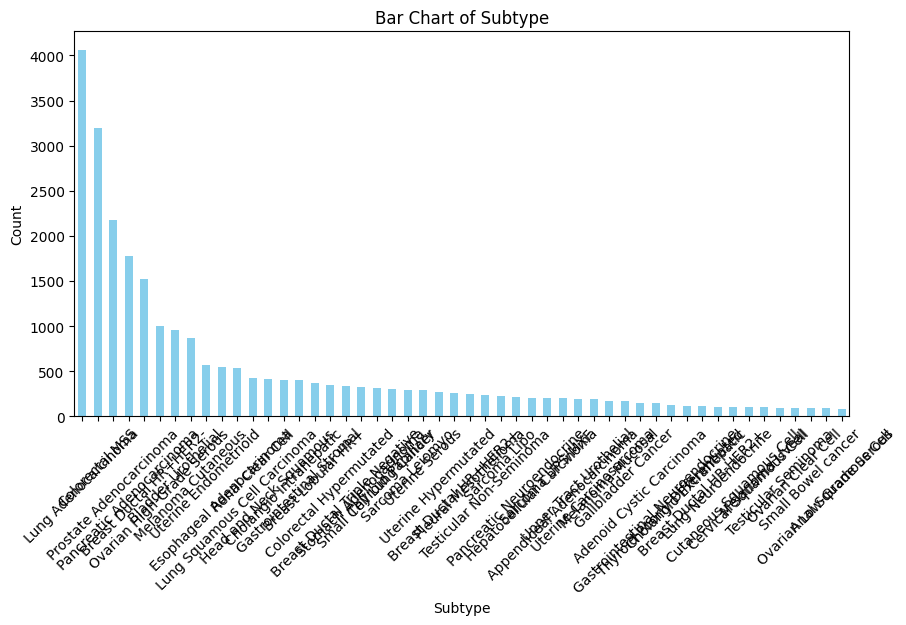

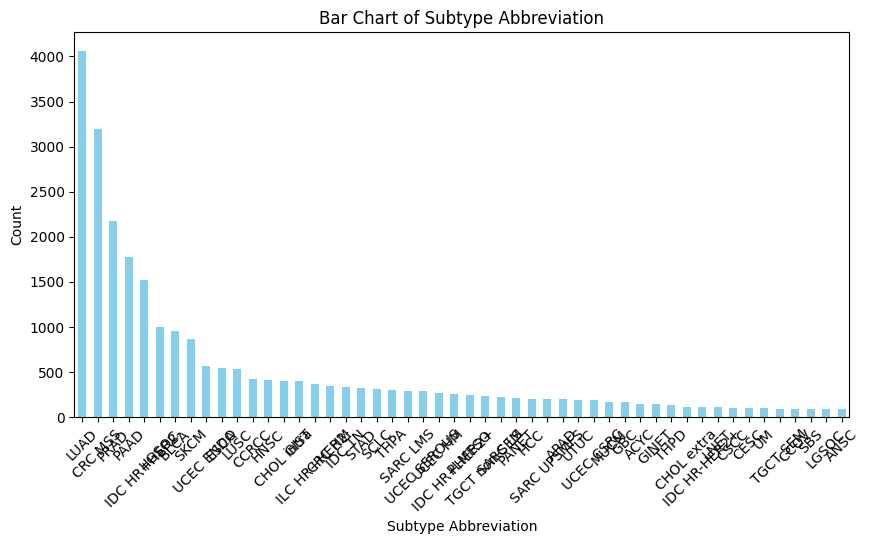

In [73]:
for column in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    value_counts = df[column].value_counts()
    
    # Create a bar chart
    value_counts.plot(kind='bar', color='skyblue')
    
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 

**Findings:**

The distant mets categories are `Yes` or `No`, we will change these to `1` and `0` so we can use these in our modeling

The `Subtype` and `Subtype Abbreviation` categories hold the same informaiton so we can drop one of these categories. We will drop the Subtype Abbreviation category as it holds less information.

There is also a class imbalance between those living and those deceased. There are more people in this study that are living. (~60/40) split.  There also seems to be a high proortion of individuals in this study with lung cancer followed by breast cancer which is indicative of the generalized population as these are the most prevalent

In [77]:
# inspect the subtype and subtype abbreviation categories:
df.groupby(['Subtype', 'Subtype Abbreviation'])['Subtype'].count()

Subtype                          Subtype Abbreviation
Adenoid Cystic Carcinoma         ACYC                     152
Anal Squamous Cell               ANSC                      87
Appendiceal Adenocarcinoma       APAD                     202
Bladder Urothelial               BLCA                     961
Breast Ductal HR+HER2+           IDC HR+HER2+             256
Breast Ductal HR+HER2-           IDC HR+HER2-            1524
Breast Ductal HR-HER2+           IDC HR-HER2+             115
Breast Ductal Triple Negative    IDC TN                   341
Breast Lobular HR+               ILC HR+HER2-             373
Cervical Squamous Cell           CESC                     103
Cholangio Extrahepatic           CHOL extra               119
Cholangio Intrahepatic           CHOL intra               407
Colorectal Hypermutated          CRC HM                   351
Colorectal MSS                   CRC MSS                 3197
Cutaneous Squamous Cell          CSCC                     105
Esophageal Adeno

In [119]:
#drop subtype abreviation category
#first dave the df as a copy
df_2 = df.copy()

In [120]:
#drop the column:
df_2.drop(columns = ['Subtype Abbreviation'], inplace=True)

In [121]:
#sanity check
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25775 entries, 0 to 25774
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      25775 non-null  object 
 1   Age at Sequencing              25775 non-null  float64
 2   Age at Surgical Procedure      25775 non-null  float64
 3   Cancer Type                    25775 non-null  object 
 4   Cancer Type Detailed           25775 non-null  object 
 5   Distant Mets: Adrenal Gland    25775 non-null  object 
 6   Distant Mets: Biliary tract    25775 non-null  object 
 7   Distant Mets: Bladder/UT       25775 non-null  object 
 8   Distant Mets: Bone             25775 non-null  object 
 9   Distant Mets: Bowel            25775 non-null  object 
 10  Distant Mets: Breast           25775 non-null  object 
 11  Distant Mets: CNS/Brain        25775 non-null  object 
 12  Distant Mets: Distant LN       25775 non-null  obje

In [122]:
#check that the word distant is in all the mets columns
for column in df_2.columns:
    if 'distant' in column.lower():
        print(column)

Distant Mets: Adrenal Gland
Distant Mets: Biliary tract
Distant Mets: Bladder/UT
Distant Mets: Bone
Distant Mets: Bowel
Distant Mets: Breast
Distant Mets: CNS/Brain
Distant Mets: Distant LN
Distant Mets: Female Genital
Distant Mets: Head and Neck
Distant Mets: Intra-Abdominal
Distant Mets: Kidney
Distant Mets: Liver
Distant Mets: Lung
Distant Mets: Male Genital
Distant Mets: Mediastinum
Distant Mets: Ovary
Distant Mets: Pleura
Distant Mets: PNS
Distant Mets: Skin
Distant Mets: Unspecified


In [123]:
#next map 1 and 0 to the distant mets columns

for column in df_2.columns:
    #iterate through the columns in the data frame and find columns that have the word distant in them. if they do then change the yes to 1 and no to 0
    if 'distant' in column.lower():
        df_2[column] = df_2[column].map({'Yes': 1, 'No': 0})

In [124]:
#sanity check
df_2.head()

,Sample ID,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,...,Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,TMB (nonsynonymous),Tumor Purity,Average Age
0,P-0000004-T01-IM3,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,0,0,0,1,0,...,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,4.436621,50.0,39.1225
1,P-0000015-T01-IM3,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,0,0,0,1,0,...,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,7.764087,40.0,44.6775
2,P-0000024-T01-IM3,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,0,0,0,1,0,...,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,6.654932,40.0,61.5050
3,P-0000025-T02-IM5,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,1,1,0,0,1,...,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,1.957439,30.0,73.9075
4,P-0000026-T01-IM3,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,0,0,0,0,1,...,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,4.436621,10.0,72.5350


The column for Overall Survival Status is also categorical. 0:LIVING, 1:DECEASED.  We will make this a bool value for 1 = Living, 0= Deceased as survival status is true means they are living

In [125]:
#check the values of the column
df_2['Overall Survival Status'].value_counts()

Overall Survival Status
0:LIVING      15606
1:DECEASED    10169
Name: count, dtype: int64

In [126]:
 #change the values
df_2['Overall Survival Status'] = df_2['Overall Survival Status'].map({'0:LIVING': 1, '1:DECEASED': 0})

In [129]:
# sanity check
df_2['Overall Survival Status'].value_counts()

Overall Survival Status
1    15606
0    10169
Name: count, dtype: int64

## Conclusions <a class="anchor" id="conclusions"></a>

Now are data is ready for the first iterations of model fitting.

We will save a copy of the EDA csv and move onto modeling

In [128]:
df_2.to_csv('cancer_data_EDA.csv')